## x3 Experiments
Using arch `yolov5n_fusion_transformerx3.yaml`. This is the original architecture.

In [ ]:
!python3 train.py --img 640 --batch 32 --epochs 100 --adam \
--data PLVIS2D.yaml --cfg models/transformer/yolov5n_fusion_transformerx3.yaml

Overfitted quite early on? val/box_loss is increasing almost all the time
![res](./runs/train/x3exp3/results.png)
Since this plot was generated with some unreliable plotting code, I check val/box_loss manually.

In [1]:
import numpy as np

In [11]:
metrics = []
with open("runs/train/x3exp3/results.txt", "r") as fp:
    while True:
        ln = fp.readline().split(" ")
        ln = list(filter(None, ln))
        if len(ln)<4:
            break
        ep = int(ln[0].split('/')[0])
        tb, to, tc = [eval(t) for t in ln[2:5]]
        p,r,map05,map075,mmap, vb, vo, vc = [eval(t) for t in ln[8:]]
        metrics.append([ep, tb, to, tc, p, r, vb, vo, vc, map05,mmap])
metrics = np.array(metrics)

In [12]:
from matplotlib import pyplot as plt

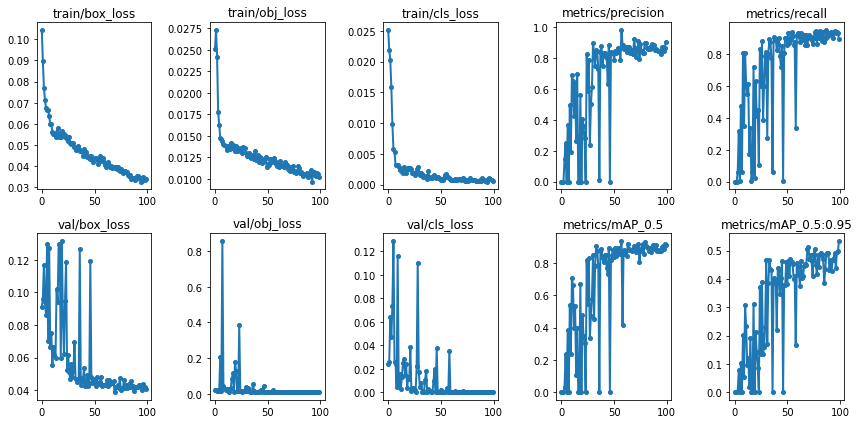

In [16]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
axs = axs.ravel()
titles = ['train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall',
          'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95']
for i, ax in enumerate(axs):
    ax.plot(metrics[:,0], metrics[:,i+1], marker='.', linewidth=2, markersize=8)
    ax.set_title(titles[i], fontsize=12)
plt.savefig("runs/train/x3exp3/results.png")

In [30]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x3exp3/weights/last.pt

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/train/x3exp3/weights/last.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 735 layers, 11188575 parameters, 0 gradients
val
val: Scanning RGB '../datasets/PLVIS2D/labels/val.rgb.cache' images and labels... 109 found, 0 missing, 6 empty, 0 corrupted
val: Scanning IR '../datasets/PLVIS2D/labels/val.ir.cache' images and labels... 109 f

In [13]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x3exp3/weights/best.pt --task test

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['runs/train/x3exp3/weights/best.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 735 layers, 11188575 parameters, 0 gradients
test
test: Scanning RGB '../datasets/PLVIS2D/labels/test.rgb.cache' images and labels... 79 found, 0 missing, 7 empty, 0 corrupted
test: Scanning IR '../datasets/PLVIS2D/labels/test.ir.cache' images and labels... 

## x010 Experiments
Using arch `yolov5n_fusion_transformerx1.yaml`, where the 1st and second transformers are removed.
### x010exp

In [ ]:
!python3 train.py --img 640 --batch 32 --epochs 30 --adam \
--data PLVIS2D.yaml --cfg models/transformer/yolov5n_fusion_transformerx1.yaml

No more such overfitting
![res](./runs/train/x010exp/results.png)
### x010exp2
Extend x010exp to 100 epochs, with increased batch size 64

In [ ]:
!python3 train.py --img 640 --batch 64 --epochs 100 --adam --name x010exp \ 
--data PLVIS2D.yaml --cfg models/transformer/yolov5n_fusion_transformerx1.yaml

![res](./runs/train/x010exp2/results.png)

In [20]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x010exp2/weights/best.pt

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/train/x010exp2/weights/best.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 481 layers, 4429023 parameters, 0 gradients
val
val: Scanning RGB '../datasets/PLVIS2D/labels/val.rgb.cache' images and labels... 109 found, 0 missing, 6 empty, 0 corrupted
val: Scanning IR '../datasets/PLVIS2D/labels/val.ir.cache' images and labels... 109 

In [11]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x010exp2/weights/best.pt --task test

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['runs/train/x010exp2/weights/best.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 481 layers, 4429023 parameters, 0 gradients
test
test: Scanning RGB '../datasets/PLVIS2D/labels/test.rgb.cache' images and labels... 79 found, 0 missing, 7 empty, 0 corrupted
test: Scanning IR '../datasets/PLVIS2D/labels/test.ir.cache' images and labels...

In [24]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x010exp2/weights/last.pt --task val

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/train/x010exp2/weights/last.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 481 layers, 4429023 parameters, 0 gradients
val
val: Scanning RGB '../datasets/PLVIS2D/labels/val.rgb.cache' images and labels... 109 found, 0 missing, 6 empty, 0 corrupted
val: Scanning IR '../datasets/PLVIS2D/labels/val.ir.cache' images and labels... 109 

In [27]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x010exp2/weights/last.pt --task test

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['runs/train/x010exp2/weights/last.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 481 layers, 4429023 parameters, 0 gradients
test
test: Scanning RGB '../datasets/PLVIS2D/labels/test.rgb.cache' images and labels... 79 found, 0 missing, 7 empty, 0 corrupted
test: Scanning IR '../datasets/PLVIS2D/labels/test.ir.cache' images and labels...

In [1]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x010exp3/weights/last.pt --task val

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/train/x010exp3/weights/last.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 481 layers, 4429023 parameters, 0 gradients
val
val: Scanning RGB '../datasets/PLVIS2D/labels/val.rgb.cache' images and labels... 109 found, 0 missing, 6 empty, 0 corrupted
val: Scanning IR '../datasets/PLVIS2D/labels/val.ir.cache' images and labels... 109 

## x010 continued

In [ ]:
!python3 train.py --img 640 --batch 64 --epochs 100 --adam --save_period 5 --name x010exp --data PLVIS2D.yaml --weights runs/train/x010exp2/weights/last.pt --hyp data/hyp.finetune.yaml

Failed. The weights are not completely loaded, and thus memory overflow. I have to train from scratch because there's no time to debug the weight loading

In [ ]:
!python3 train.py --img 640 --batch 64 --epochs 100 --adam --save_period 5 --name x010exp --data PLVIS2D.yaml --cfg models/transformer/yolov5n_fusion_transformerx1.yaml

In [19]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x010exp3/weights/best.pt

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/train/x010exp3/weights/best.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 481 layers, 4429023 parameters, 0 gradients
val
val: Scanning RGB '../datasets/PLVIS2D/labels/val.rgb.cache' images and labels... 109 found, 0 missing, 6 empty, 0 corrupted
val: Scanning IR '../datasets/PLVIS2D/labels/val.ir.cache' images and labels... 109 

In [18]:
!python3 train.py --img 640 --batch 64 --epochs 100 --adam --save_period 5 --name x010exp --data PLVIS2D.yaml --weights runs/train/x010exp2/weights/last.pt --hyp data/hyp.finetune.yaml

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=True, artifact_alias='latest', batch_size=64, bbox_interval=-1, bucket='', cache_images=False, cfg='./models/transformer/yolov5l_fusion_add_FLIR_aligned.yaml', data='./data/multispectral/PLVIS2D.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.finetune.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='x010exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/x010exp6', save_period=5, single_cls=False, sync_bn=False, total_batch_size=64, upload

## x01fuse
Really fuse to a single stream after the tranfromer

In [ ]:
!python3 train.py --img 640 --batch 64 --epochs 100 --adam --save_period 5 \
--data PLVIS2D.yaml --cfg models/transformer/yolov5n_transformerx01fuse.yaml --name x0exp

![res](./runs/train/x01fuse/results.png)

In [28]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x01fuse/weights/best.pt

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/train/x01fuse/weights/best.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 448 layers, 3673951 parameters, 0 gradients
val
val: Scanning RGB '../datasets/PLVIS2D/labels/val.rgb.cache' images and labels... 109 found, 0 missing, 6 empty, 0 corrupted
val: Scanning IR '../datasets/PLVIS2D/labels/val.ir.cache' images and labels... 109 f

In [29]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x01fuse/weights/last.pt

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/train/x01fuse/weights/last.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 448 layers, 3673951 parameters, 0 gradients
val
val: Scanning RGB '../datasets/PLVIS2D/labels/val.rgb.cache' images and labels... 109 found, 0 missing, 6 empty, 0 corrupted
val: Scanning IR '../datasets/PLVIS2D/labels/val.ir.cache' images and labels... 109 f

### x0exp
i.e. no transformer, just two streams

In [ ]:
!python3 train.py --img 640 --batch 64 --epochs 100 --adam --save_period 5 --data PLVIS2D.yaml --cfg models/transformer/yolov5n_fusion_add.yaml --name x0exp

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=True, artifact_alias='latest', batch_size=64, bbox_interval=-1, bucket='', cache_images=False, cfg='models/transformer/yolov5n_fusion_add.yaml', data='./data/multispectral/PLVIS2D.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='x0exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/x0exp', save_period=5, single_cls=False, sync_bn=False, total_batch_size=64, upload_dataset=False, weigh

![res](./runs/train/x0exp/results.png)

In [6]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x0exp/weights/best.pt

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/train/x0exp/weights/best.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 354 layers, 2826207 parameters, 0 gradients
val
val: Scanning RGB '../datasets/PLVIS2D/labels/val.rgb.cache' images and labels... 109 found, 0 missing, 6 empty, 0 corrupted
val: Scanning IR '../datasets/PLVIS2D/labels/val.ir.cache' images and labels... 109 fou

In [9]:
!python3 test.py --data PLVIS2D.yaml --weights runs/train/x0exp/weights/best.pt --task test

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Namespace(augment=False, batch_size=64, conf_thres=0.001, data='./data/multispectral/PLVIS2D.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.5, name='exp', project='runs/test', save_conf=True, save_hybrid=False, save_json=False, save_txt=True, single_cls=False, task='test', verbose=False, weights=['runs/train/x0exp/weights/best.pt'])
./data/multispectral/PLVIS2D.yaml
YOLOv5 🚀 bb2b687 torch 1.8.1+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 354 layers, 2826207 parameters, 0 gradients
test
test: Scanning '../datasets/PLVIS2D/labels/test.rgb' images and labels... 79 fou
test: New cache created: ../datasets/PLVIS2D/labels/test.rgb.cache
test: Scanning '../datasets/PLVIS2D/labels/test.ir' images and